In [15]:
import numpy as np
import sys
from rnn_norm import RNN
import matplotlib.pyplot as plt
import json
import torch

## Loading Trained Weights

In [16]:
with open('sinwave_norm_128_nodes/weight_history.json') as f:
    weight_history = json.load(f)

In [17]:
weight_history.keys()

dict_keys(['trained weights', 'connectivity matrix', 'input weights', 'output weights'])

In [18]:
weight_matrix = np.array(weight_history['trained weights'])
connectivity_matrix = np.array(weight_history['connectivity matrix'])
input_weights = np.array(weight_history['input weights'])
output_weight_matrix = np.array(weight_history['output weights'])

## Defining Network

In [19]:
time_constant = 100 #ms
timestep = 10 #ms
time = 500 #ms
num_inputs = 1
num_nodes = 128
init_activations = np.zeros((num_nodes, 1))

network = RNN(weight_matrix, connectivity_matrix, init_activations, output_weight_matrix, 
                time_constant = time_constant, timestep = timestep)

100%|██████████| 50/50 [00:00<00:00, 3295.08it/s]

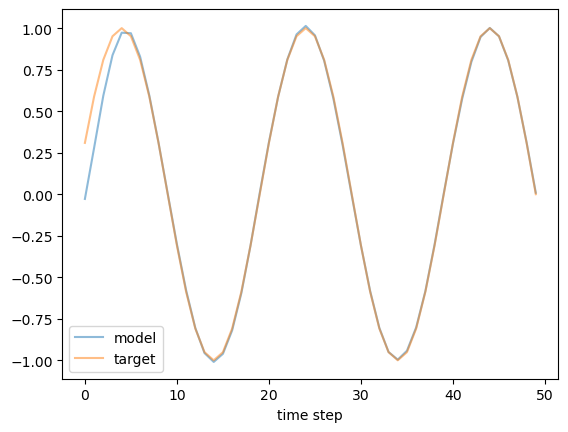

In [20]:
time_points = np.arange(50).reshape(-1,1)
# inputs = (1 + np.sin(time_points/10*np.pi))/2
# targets = (1 + np.sin((time_points+1)/10*np.pi))/2
inputs = np.sin(time_points/10*np.pi)
targets = np.sin((time_points+1)/10*np.pi)
inputs = inputs.reshape(-1,1)
targets = targets.reshape(-1,1)
outputs, activations = network.simulate(time, torch.tensor(inputs).float(), input_weights)
fig, ax = plt.subplots()
plt.plot(time_points, outputs.detach().numpy(), alpha=0.5, label='model')
# plt.plot(time_points, inputs)
plt.plot(time_points, targets, alpha=0.5, label='target')
plt.xlabel("time step")
plt.legend()
plt.savefig("fig/sin_train_norm.png")

100%|██████████| 50/50 [00:00<00:00, 7093.84it/s]


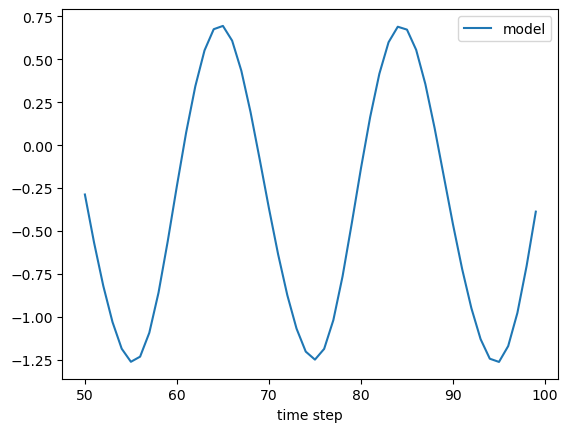

In [21]:
time_pred = 500
time_points_pred = np.arange(50,100).reshape(-1,1)
inputs_pred = (1 + np.sin(time_points_pred/10*np.pi))/2
inputs = inputs.reshape(-1,1)

outputs_pred, activations_pred = network.simulate(time_pred, torch.tensor(inputs_pred).float(), input_weights)
fig, ax = plt.subplots()
plt.plot(time_points_pred, outputs_pred.detach().numpy(), label='model')
plt.xlabel("time step")
plt.legend()
plt.savefig("fig/sin_pred_norm.png")